In [3]:
# Installing pyspark on local machine
!pip install pyspark 

In [4]:
# Importing installed pyspark
import pyspark

In [5]:
# Importing PySpark Session 
from pyspark.sql import SparkSession

In [6]:
# Creating Spark and setting a name for the application
spark=SparkSession.builder.appName('Project').getOrCreate()

In [7]:
spark

In [60]:
# Reading csv file using spark
music = spark.read.csv(r"C:\Users\AJINKYA\Desktop\1_Datasets-main\export_dataframe.csv")

In [61]:
# Displaying the dataset
music.show()

+--------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+----+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|     _c0|                 _c1|                 _c2|                 _c3|                 _c4|       _c5|        _c6|     _c7|         _c8|   _c9|_c10|    _c11|_c12|       _c13|        _c14|            _c15|    _c16|   _c17|   _c18|          _c19|       _c20|
+--------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+----+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|index_id|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy| key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|vale

In [62]:
# Replacing Column number with header name 
music=spark.read.option('header','true').csv(r'C:\Users\AJINKYA\Desktop\Project\01_March_spotify.csv')

In [63]:
music

DataFrame[index_id: string, track_id: string, artists: string, album_name: string, track_name: string, popularity: string, duration_ms: string, explicit: string, danceability: string, energy: string, key: string, loudness: string, mode: string, speechiness: string, acousticness: string, instrumentalness: string, liveness: string, valence: string, tempo: string, time_signature: string, track_genre: string, spotify_release_date: string]

In [64]:
# Displaying the edited file
music.show()

+--------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+--------------------+
|index_id|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|spotify_release_date|
+--------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+--------------------+
|       0|5SuOikwiRyPMVoIQD...|         Gen Hoshino|              Comedy|              Comedy|        73|     230666|   FALSE|       0.676| 0.461|  1|  -6.746| 

In [65]:
## Check the schema of the dataset
music.printSchema()

root
 |-- index_id: string (nullable = true)
 |-- track_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- album_name: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- duration_ms: string (nullable = true)
 |-- explicit: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- key: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- liveness: string (nullable = true)
 |-- valence: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- time_signature: string (nullable = true)
 |-- track_genre: string (nullable = true)
 |-- spotify_release_date: string (nullable = true)



In [66]:
# Changing the datatype of the columns
from pyspark.sql.types import IntegerType
from pyspark.sql.types import DoubleType
from pyspark.sql.types import BooleanType
from pyspark.sql.types import DateType




music = music.withColumn("popularity",music["popularity"].cast(IntegerType()))
music = music.withColumn("duration_ms",music["duration_ms"].cast(DoubleType()))
music = music.withColumn("explicit",music["explicit"].cast(BooleanType()))
music = music.withColumn("danceability",music["danceability"].cast(DoubleType()))
music = music.withColumn("energy",music["energy"].cast(DoubleType()))
music = music.withColumn("key",music["key"].cast(IntegerType()))
music = music.withColumn("loudness",music["loudness"].cast(DoubleType()))
music = music.withColumn("mode",music["mode"].cast(BooleanType()))
music = music.withColumn("speechiness",music["speechiness"].cast(DoubleType()))
music = music.withColumn("acousticness",music["acousticness"].cast(DoubleType()))
music = music.withColumn("instrumentalness",music["instrumentalness"].cast(DoubleType()))
music = music.withColumn("liveness",music["liveness"].cast(DoubleType()))
music = music.withColumn("valence",music["valence"].cast(DoubleType()))
music = music.withColumn("spotify_release_date",music["spotify_release_date"].cast(DateType()))

In [67]:
music.printSchema()

root
 |-- index_id: string (nullable = true)
 |-- track_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- album_name: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- duration_ms: double (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: boolean (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: string (nullable = true)
 |-- time_signature: string (nullable = true)
 |-- track_genre: string (nullable = true)
 |-- spotify_release_date: date (nullable = true)



In [68]:
# Deleting null values
music.na.drop(how='any').count()

113865

Total 135 rows with any null value are deleted

In [69]:
music.show()

+--------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+-----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+--------------------+
|index_id|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness| mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|spotify_release_date|
+--------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+-----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+--------------------+
|       0|5SuOikwiRyPMVoIQD...|         Gen Hoshino|              Comedy|              Comedy|        73|   230666.0|   false|       0.676| 0.461|  1|  -6.74

# Outlier detection

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
music= pd.read_csv(r"C:\Users\AJINKYA\Desktop\1_Datasets-main\export_dataframe.csv")

In [72]:
music.shape

(114000, 21)

In [74]:
music.describe()

,index_id,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [75]:
X = music.drop(['index_id','track_id','artists','album_name','track_name','duration_ms','explicit','key','mode','liveness','track_genre'], axis=1)
y = music['track_genre']

In [27]:
clf = IsolationForest(contamination=0.03,random_state=2022)

NameError: name 'IsolationForest' is not defined

In [148]:
clf.fit(X)
pred_outliers = clf.predict(X)

In [149]:
music['outliers'] = pred_outliers
music['outliers'] = music['outliers'].astype(str)

<AxesSubplot:xlabel='tempo', ylabel='popularity'>

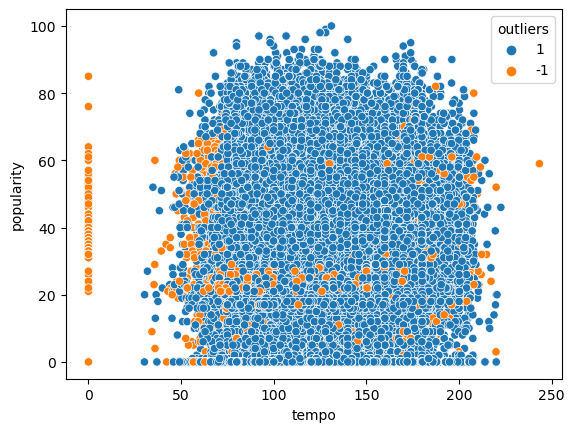

In [150]:
sns.scatterplot(x='tempo',y='popularity',hue='outliers', data=music)

### Feature Extraction

In [76]:
X = music.drop(columns = ["track_id","index_id", "artists", "album_name", "track_name", "track_genre","duration_ms","explicit","key"])
y = music["track_genre"]

### Scalling Data

In [77]:
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [78]:
scale = StandardScaler()

In [79]:
music= pd.read_csv(r"C:\Users\AJINKYA\Desktop\1_Datasets-main\export_dataframe.csv")

In [80]:
X = music.drop(['track_id','artists','album_name','track_name','duration_ms','explicit','mode','liveness','track_genre'], axis=1)

In [81]:
scaledX = scale.fit_transform(X)

In [82]:
print(scaledX)

[[-1.73203561  1.78262719  0.62924424 ...  0.92930586 -1.14186279
   0.22182318]
 [-1.73200523  0.97563254 -0.84590798 ... -0.79868969 -1.48971712
   0.22182318]
 [-1.73197484  1.06529861 -0.74218634 ... -1.36568823 -1.528312
   0.22182318]
 ...
 [ 1.73197484 -0.50385765  0.35841551 ...  1.03730558  0.34125493
   0.22182318]
 [ 1.73200523  0.34797004  0.11639835 ... -0.23554828  0.4607423
   0.22182318]
 [ 1.73203561 -0.50385765 -0.23510276 ...  0.90230593 -1.43270877
   0.22182318]]


### Model Building

Decision Tree Classifier using all the features

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import time

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model = DecisionTreeClassifier()

In [85]:
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
fitting_time = end_time - start_time

In [86]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

In [87]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.88%


In [88]:
# Print the time taken to fit the model
print("Time taken to fit the model: {:.2f} seconds".format(fitting_time))

Time taken to fit the model: 1.14 seconds


K-Nearest Neighbors classification using all the features

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import time

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
knn = KNeighborsClassifier(n_neighbors=3)

In [92]:
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
fitting_time = end_time - start_time

In [93]:
y_pred = knn.predict(X_test)

In [94]:
accuracy = accuracy_score(y_test, y_pred)

In [95]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.85%


In [96]:
# Print the time taken to fit the model
print("Time taken to fit the model: {:.2f} seconds".format(fitting_time))

Time taken to fit the model: 0.25 seconds


Random Forest classification using all the features

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [100]:
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()
fitting_time = end_time - start_time

In [101]:
y_pred =rf.predict(X_test)

In [102]:
accuracy = accuracy_score(y_test, y_pred)

In [103]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.91%


In [56]:
# Print the time taken to fit the model
print("Time taken to fit the model: {:.2f} seconds".format(fitting_time))

Time taken to fit the model: 34.56 seconds


SVM Classifier using all the features

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

In [ ]:
# Make predictions on test set
y_pred = svm.predict(X_test)

In [ ]:
# Calculate accuracy of predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [1]:
#Random Forest classification using all the features

In [106]:
X = music.drop(columns = ["track_id","index_id","artists", "album_name", "track_name", "track_genre","duration_ms","explicit","key","mode","liveness"])
y = music["track_genre"]

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()
fitting_time = end_time - start_time

y_pred =rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Print the time taken to fit the model
print("Time taken to fit the model: {:.2f} seconds".format(fitting_time))

Accuracy: 30.00%
Time taken to fit the model: 37.94 seconds


In [107]:
y = rf.predict([[50,0.369,0.598,-6.984,0.0304,0.005110,0.000000,0.0466,148.014,4]])

In [108]:
y

array(['world-music'], dtype=object)